In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

In [2]:
df = pd.read_csv(r"C:\Users\USER\Documents\DS12\my_project\cilmate\Manhuacu_Clean.csv")

In [3]:
pd.set_option('display.max_columns', None)
df.head()

,Unnamed: 0,city,medication_date,total_daily_rainfall_aut_mm,daily_average_atmospheric_pressure_aut_m_b,average_daily_dew_point_temp_c,max_daily_temp_c,average_daily_temp_c,min_daily_temp_c,average_daily_air_relative_humidity_aut,minimum_daily_air_humidity_aut,wind_max_daily_gust_ms,wind_average_daily_speed_ms,x
0,1,Manhuacu,24/09/2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Manhuacu,25/09/2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Manhuacu,26/09/2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Manhuacu,27/09/2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Manhuacu,28/09/2010,NaN,919.161538,16.292308,20.8,NaN,19.0,86.384615,73.0,9.1,2.123077,NaN


In [4]:
df.describe(include = "all")

,Unnamed: 0,city,medication_date,total_daily_rainfall_aut_mm,daily_average_atmospheric_pressure_aut_m_b,average_daily_dew_point_temp_c,max_daily_temp_c,average_daily_temp_c,min_daily_temp_c,average_daily_air_relative_humidity_aut,minimum_daily_air_humidity_aut,wind_max_daily_gust_ms,wind_average_daily_speed_ms,x
count,3387.000000,3387,3387,2684.000000,2890.000000,3040.000000,3157.000000,2953.000000,3156.000000,3094.000000,3157.000000,3156.000000,3067.000000,0.0
unique,NaN,1,3387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Manhuacu,08/10/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,3387,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1694.000000,NaN,NaN,3.328838,923.736576,15.381095,26.160089,20.171744,15.804531,75.786821,50.614191,8.883270,2.028165,NaN
std,977.887008,NaN,NaN,9.964032,3.074781,2.587133,3.144415,2.546248,3.299423,7.648599,12.760717,2.376484,0.738198,NaN
min,1.000000,NaN,NaN,0.000000,913.866667,5.945833,15.600000,12.804167,4.300000,43.000000,14.000000,2.200000,0.460000,NaN
25%,847.500000,NaN,NaN,0.000000,921.741667,13.561458,24.000000,18.086364,13.800000,70.583333,42.000000,7.300000,1.454167,NaN
50%,1694.000000,NaN,NaN,0.000000,923.457083,15.850000,26.400000,20.537500,16.600000,76.208333,50.000000,8.500000,1.912500,NaN
75%,2540.500000,NaN,NaN,0.600000,925.641667,17.400000,28.500000,22.247826,18.300000,81.416667,58.000000,9.900000,2.479167,NaN


In [5]:
df.drop(columns= ["x", "Unnamed: 0"], inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   city                                        3387 non-null   object 
 1   medication_date                             3387 non-null   object 
 2   total_daily_rainfall_aut_mm                 2684 non-null   float64
 3   daily_average_atmospheric_pressure_aut_m_b  2890 non-null   float64
 4   average_daily_dew_point_temp_c              3040 non-null   float64
 5   max_daily_temp_c                            3157 non-null   float64
 6   average_daily_temp_c                        2953 non-null   float64
 7   min_daily_temp_c                            3156 non-null   float64
 8   average_daily_air_relative_humidity_aut     3094 non-null   float64
 9   minimum_daily_air_humidity_aut              3157 non-null   float64
 10  wind_max_dai

In [8]:
#import sweetviz as sv
#report = sv.analyze(df)
#report.show_html('Manhuacu_report.html')

#### Turn "medication_date" to Date

In [9]:
df['Date'] = df["medication_date"]
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, infer_datetime_format=True)
df['year'] = df['Date'].dt.year
df["month"] = df['Date'].dt.month
df['week'] = df['Date'].dt.isocalendar().week

df.tail(5)

,city,medication_date,total_daily_rainfall_aut_mm,daily_average_atmospheric_pressure_aut_m_b,average_daily_dew_point_temp_c,max_daily_temp_c,average_daily_temp_c,min_daily_temp_c,average_daily_air_relative_humidity_aut,minimum_daily_air_humidity_aut,wind_max_daily_gust_ms,wind_average_daily_speed_ms,Date,year,month,week
3382,Manhuacu,28/12/2019,0.0,923.641667,17.200000,29.7,22.029167,18.2,76.208333,42.0,10.9,2.691667,2019-12-28,2019,12,52
3383,Manhuacu,29/12/2019,43.6,922.150000,16.912500,28.2,21.162500,18.3,78.625000,47.0,21.0,1.700000,2019-12-29,2019,12,52
3384,Manhuacu,30/12/2019,17.0,920.366667,16.233333,28.3,21.416667,16.1,74.458333,41.0,8.3,1.720833,2019-12-30,2019,12,1
3385,Manhuacu,31/12/2019,0.0,920.033333,16.829167,28.6,22.291667,17.7,73.125000,42.0,9.2,1.645833,2019-12-31,2019,12,1
3386,Manhuacu,01/01/2020,1.0,919.075000,17.191667,29.7,23.416667,18.4,70.291667,44.0,8.8,1.979167,2020-01-01,2020,1,1


### Testing for Outliers

In [11]:
col_names = list(df.columns)
col_names

['city',
 'medication_date',
 'total_daily_rainfall_aut_mm',
 'daily_average_atmospheric_pressure_aut_m_b',
 'average_daily_dew_point_temp_c',
 'max_daily_temp_c',
 'average_daily_temp_c',
 'min_daily_temp_c',
 'average_daily_air_relative_humidity_aut',
 'minimum_daily_air_humidity_aut',
 'wind_max_daily_gust_ms',
 'wind_average_daily_speed_ms',
 'Date',
 'year',
 'month',
 'week']

<AxesSubplot:xlabel='wind_average_daily_speed_ms'>

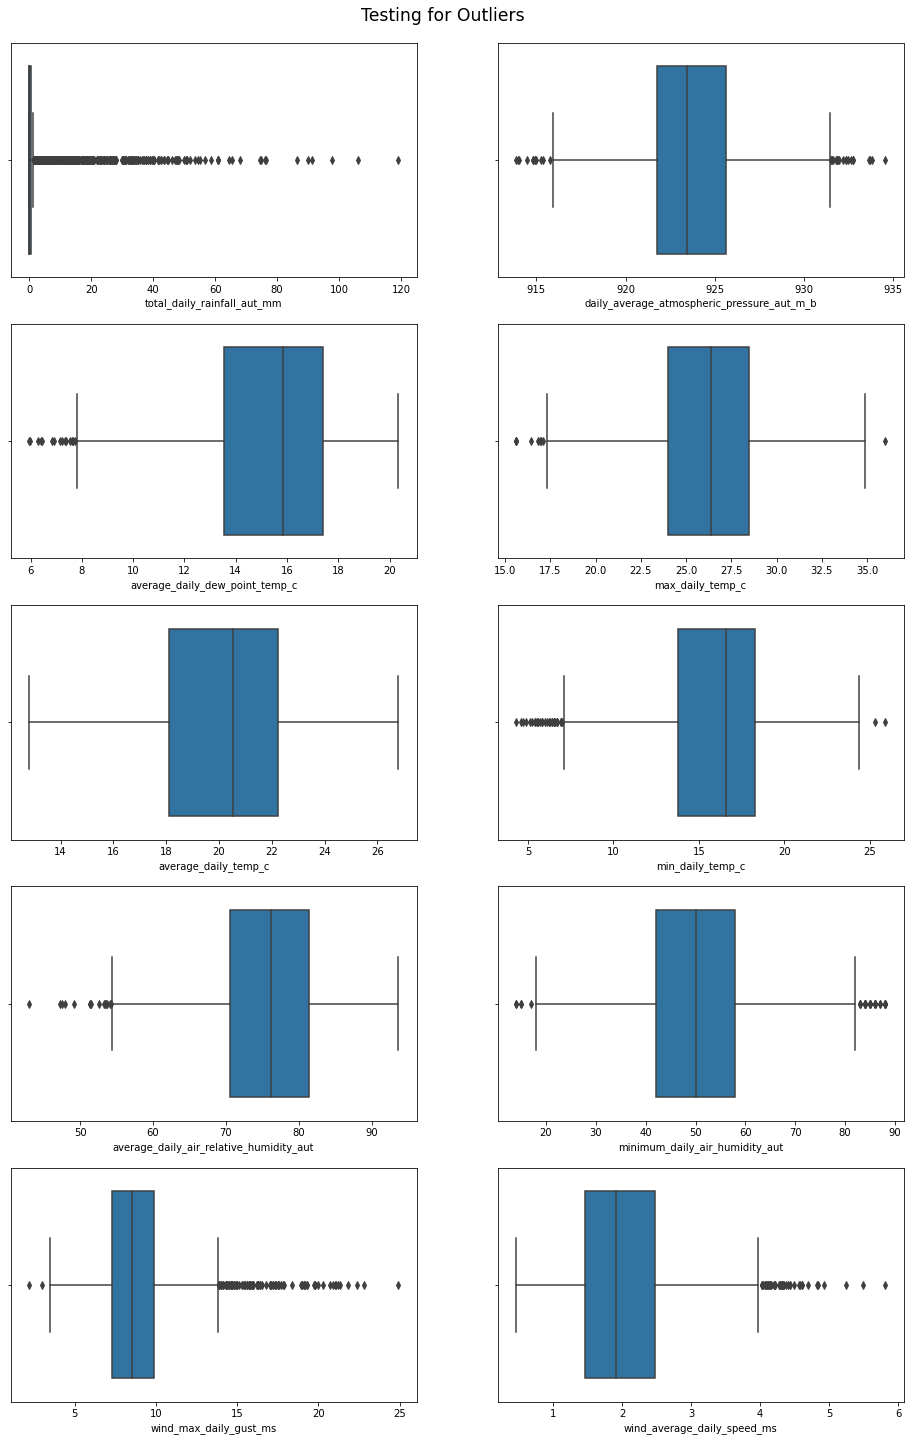

In [12]:
fig, axes = plt.subplots(5,2, figsize=(16,25))
fig.suptitle('Testing for Outliers', y= 0.9, fontsize =  'xx-large')
sns.boxplot(ax=axes[0, 0], x='total_daily_rainfall_aut_mm', data = df)
sns.boxplot(ax=axes[0, 1], x='daily_average_atmospheric_pressure_aut_m_b', data = df)
sns.boxplot(ax=axes[1, 0], x='average_daily_dew_point_temp_c', data = df)
sns.boxplot(ax=axes[1, 1], x='max_daily_temp_c', data = df)
sns.boxplot(ax=axes[2, 0], x='average_daily_temp_c', data = df)
sns.boxplot(ax=axes[2, 1], x='min_daily_temp_c', data = df)
sns.boxplot(ax=axes[3, 0], x='average_daily_air_relative_humidity_aut', data = df)
sns.boxplot(ax=axes[3, 1], x='minimum_daily_air_humidity_aut', data = df)
sns.boxplot(ax=axes[4, 0], x='wind_max_daily_gust_ms',  data = df)
sns.boxplot(ax=axes[4, 1], x='wind_average_daily_speed_ms', data = df)

<AxesSubplot:xlabel='year', ylabel='total_daily_rainfall_aut_mm'>

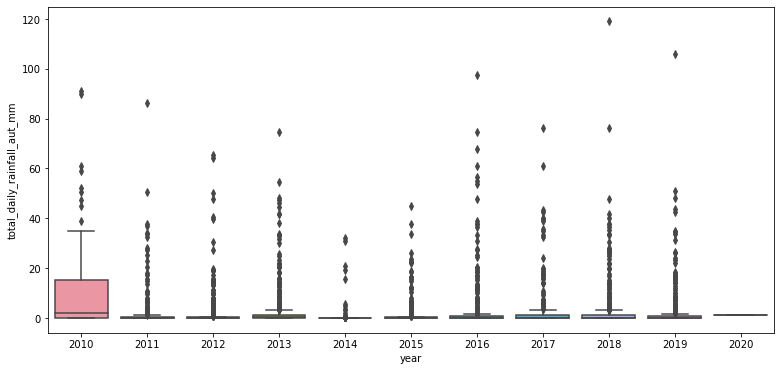

In [13]:
plt.figure(figsize=(13, 6))
sns.boxplot(y='total_daily_rainfall_aut_mm', x= 'year', data = df)

<AxesSubplot:xlabel='year', ylabel='min_daily_temp_c'>

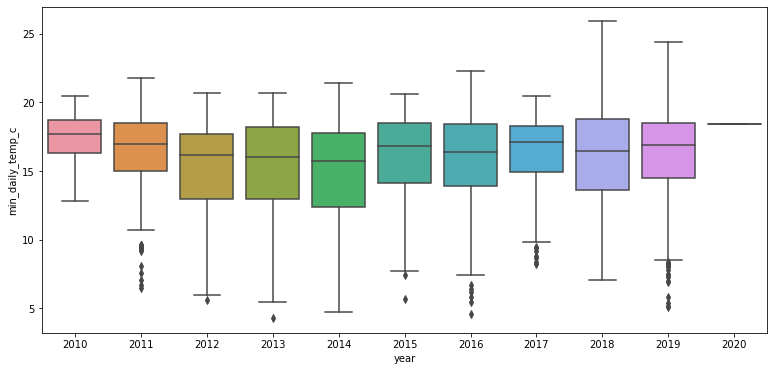

In [14]:
plt.figure(figsize=(13, 6))
sns.boxplot(y='min_daily_temp_c', x= 'year', data = df)

<AxesSubplot:xlabel='year', ylabel='max_daily_temp_c'>

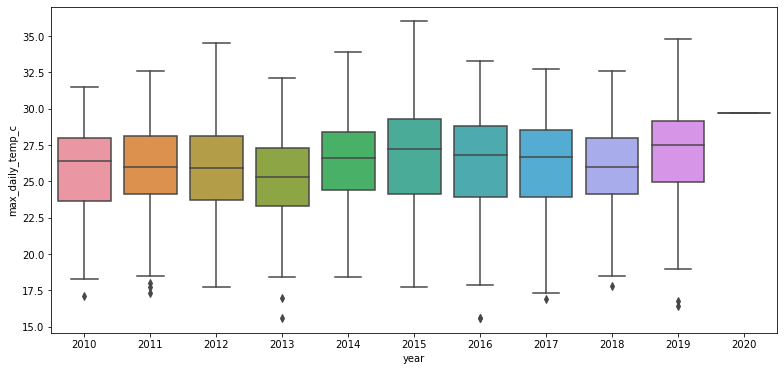

In [15]:
plt.figure(figsize=(13, 6))
sns.boxplot(y='max_daily_temp_c', x= 'year', data = df)

<AxesSubplot:xlabel='year', ylabel='average_daily_dew_point_temp_c'>

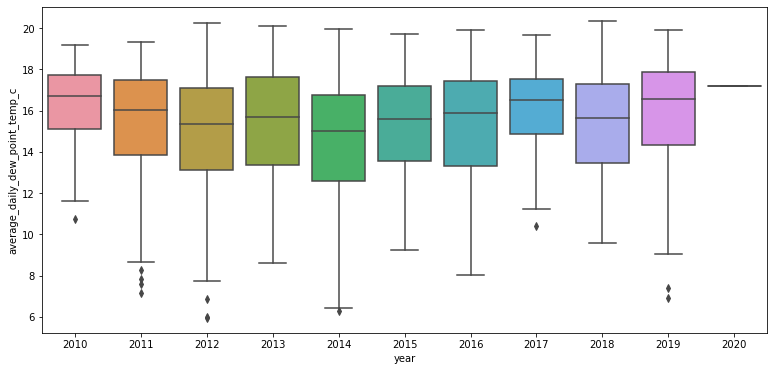

In [16]:
plt.figure(figsize=(13, 6))
sns.boxplot(y='average_daily_dew_point_temp_c', x= 'year', data = df)

<AxesSubplot:xlabel='year', ylabel='wind_average_daily_speed_ms'>

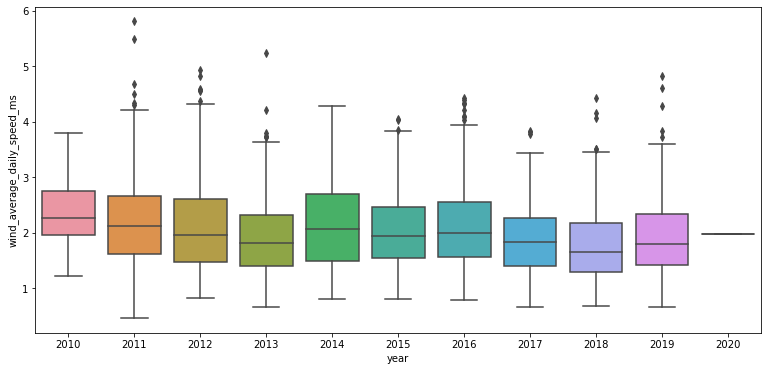

In [17]:
plt.figure(figsize=(13, 6))
sns.boxplot(y='wind_average_daily_speed_ms', x= 'year', data = df)

### Missing values

In [7]:
df.isnull().sum()

city                                            0
medication_date                                 0
total_daily_rainfall_aut_mm                   703
daily_average_atmospheric_pressure_aut_m_b    497
average_daily_dew_point_temp_c                347
max_daily_temp_c                              230
average_daily_temp_c                          434
min_daily_temp_c                              231
average_daily_air_relative_humidity_aut       293
minimum_daily_air_humidity_aut                230
wind_max_daily_gust_ms                        231
wind_average_daily_speed_ms                   320
dtype: int64

Nulls range 6.8% - 20%

In [18]:
df_nulls = df.copy()

#set date as index
df_nulls = df_nulls.set_index('Date')

columns = list(df_nulls.columns)

for col in columns:
    new_col_name = col+"_nulls"
    df_nulls[new_col_name] = 0
    df_nulls.loc[(df_nulls[col].isnull()),[new_col_name]] = 1

df_nulls2 = df_nulls.copy()   

df_nulls.drop(columns=columns, inplace=True)

    
df_nulls.head()

,city_nulls,medication_date_nulls,total_daily_rainfall_aut_mm_nulls,daily_average_atmospheric_pressure_aut_m_b_nulls,average_daily_dew_point_temp_c_nulls,max_daily_temp_c_nulls,average_daily_temp_c_nulls,min_daily_temp_c_nulls,average_daily_air_relative_humidity_aut_nulls,minimum_daily_air_humidity_aut_nulls,wind_max_daily_gust_ms_nulls,wind_average_daily_speed_ms_nulls,year_nulls,month_nulls,week_nulls
Date,,,,,,,,,,,,,,,
2010-09-24,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0
2010-09-25,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0
2010-09-26,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0
2010-09-27,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0
2010-09-28,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0


<AxesSubplot:ylabel='Date'>

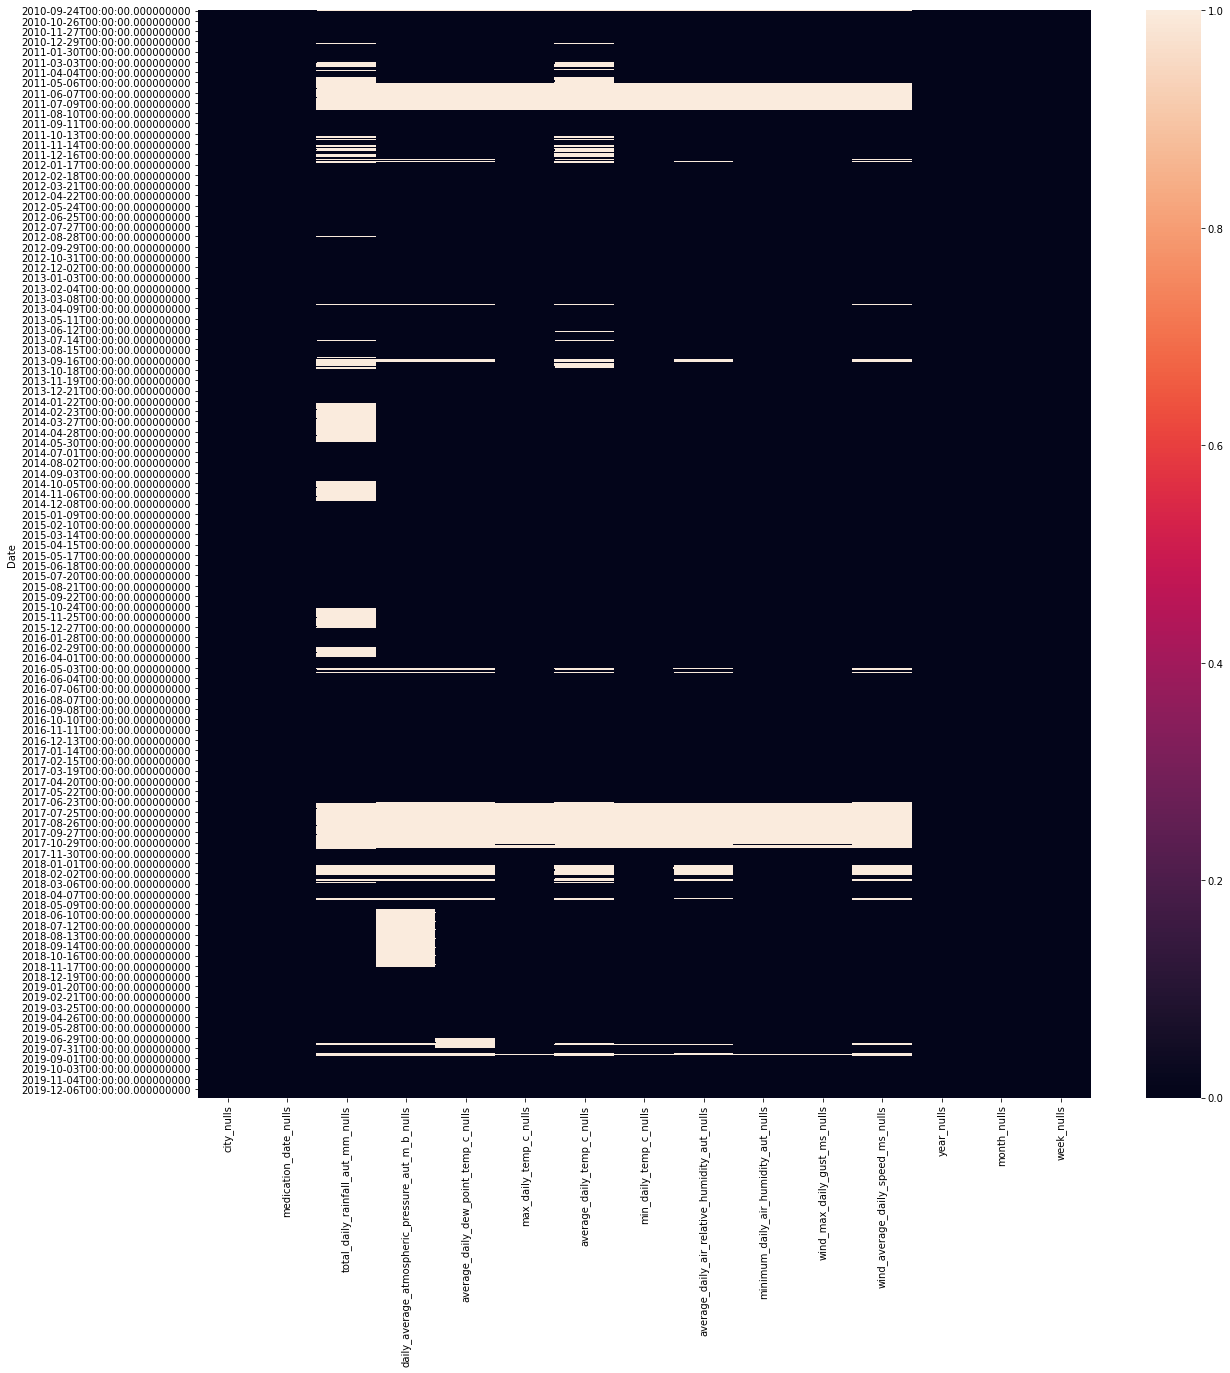

In [19]:
plt.figure(figsize=(20,20))
sns.heatmap(df_nulls)

In [20]:
df_copy2 = df.copy()

for col in df.columns:
    new_col_name = col+"_nulls"
    df_copy2[new_col_name] = 0
    df_copy2.loc[(df_copy2[col].isnull()),[new_col_name]] = 1
    
df_copy2.head()

,city,medication_date,total_daily_rainfall_aut_mm,daily_average_atmospheric_pressure_aut_m_b,average_daily_dew_point_temp_c,max_daily_temp_c,average_daily_temp_c,min_daily_temp_c,average_daily_air_relative_humidity_aut,minimum_daily_air_humidity_aut,wind_max_daily_gust_ms,wind_average_daily_speed_ms,Date,year,month,week,city_nulls,medication_date_nulls,total_daily_rainfall_aut_mm_nulls,daily_average_atmospheric_pressure_aut_m_b_nulls,average_daily_dew_point_temp_c_nulls,max_daily_temp_c_nulls,average_daily_temp_c_nulls,min_daily_temp_c_nulls,average_daily_air_relative_humidity_aut_nulls,minimum_daily_air_humidity_aut_nulls,wind_max_daily_gust_ms_nulls,wind_average_daily_speed_ms_nulls,Date_nulls,year_nulls,month_nulls,week_nulls
0,Manhuacu,24/09/2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-09-24,2010,9,38,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0
1,Manhuacu,25/09/2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-09-25,2010,9,38,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0
2,Manhuacu,26/09/2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-09-26,2010,9,38,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0
3,Manhuacu,27/09/2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-09-27,2010,9,39,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0
4,Manhuacu,28/09/2010,NaN,919.161538,16.292308,20.8,NaN,19.0,86.384615,73.0,9.1,2.123077,2010-09-28,2010,9,39,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0


(array([450., 201., 222., 207., 236., 210., 238., 226., 228., 466.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <BarContainer object of 10 artists>)

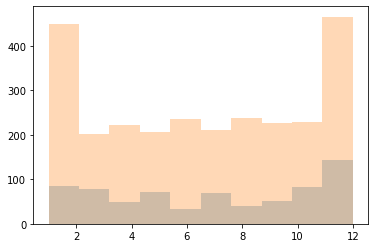

In [33]:
# test if rain nulls are dont random in relation to the month

x1 = df_copy2.loc[df_copy2['total_daily_rainfall_aut_mm_nulls']==1, 'month']
x0 =df_copy2.loc[df_copy2['total_daily_rainfall_aut_mm_nulls']==0, 'month']
plt.hist(x1,alpha=0.3)
plt.hist(x0,alpha=0.3)

(array([ 15.,  39., 117., 203., 251., 363., 499., 714., 454.,  29.]),
 array([ 4.3 ,  6.08,  7.86,  9.64, 11.42, 13.2 , 14.98, 16.76, 18.54,
        20.32, 22.1 ]),
 <BarContainer object of 10 artists>)

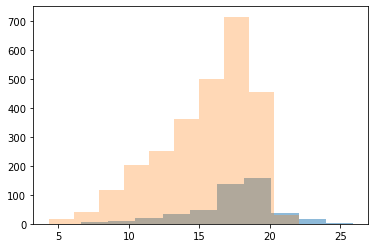

In [34]:
# test if rain nulls are dont random in relation to the min temp

x1 = df_copy2.loc[df_copy2['total_daily_rainfall_aut_mm_nulls']==1, 'min_daily_temp_c']
x0 =df_copy2.loc[df_copy2['total_daily_rainfall_aut_mm_nulls']==0, 'min_daily_temp_c']
plt.hist(x1,alpha=0.5)
plt.hist(x0,alpha=0.3)

(array([  8.,  53., 186., 404., 540., 638., 560., 234.,  52.,   9.]),
 array([15.6 , 17.64, 19.68, 21.72, 23.76, 25.8 , 27.84, 29.88, 31.92,
        33.96, 36.  ]),
 <BarContainer object of 10 artists>)

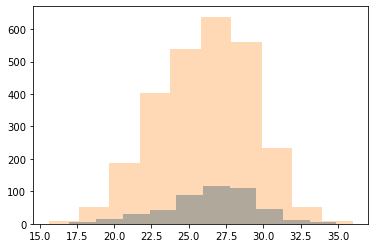

In [35]:
# test if rain nulls are dont random in relation to the max temp

x1 = df_copy2.loc[df_copy2['total_daily_rainfall_aut_mm_nulls']==1, 'max_daily_temp_c']
x0 =df_copy2.loc[df_copy2['total_daily_rainfall_aut_mm_nulls']==0, 'max_daily_temp_c']
plt.hist(x1,alpha=0.5)
plt.hist(x0,alpha=0.3)

(array([ 10.,  55., 186., 397., 553., 713., 646., 258.,  61.,  11.]),
 array([15.6 , 17.64, 19.68, 21.72, 23.76, 25.8 , 27.84, 29.88, 31.92,
        33.96, 36.  ]),
 <BarContainer object of 10 artists>)

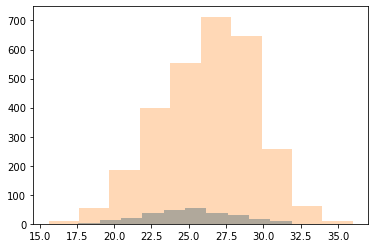

In [37]:
# test if pressure nulls are dont random in relation to the max temp

x1 = df_copy2.loc[df_copy2['daily_average_atmospheric_pressure_aut_m_b_nulls']==1, 'max_daily_temp_c']
x0 =df_copy2.loc[df_copy2['daily_average_atmospheric_pressure_aut_m_b_nulls']==0, 'max_daily_temp_c']
plt.hist(x1,alpha=0.5)
plt.hist(x0,alpha=0.3)

(array([ 88., 701., 862., 603., 399., 151.,  57.,  22.,   4.,   2.]),
 array([0.46 , 0.995, 1.53 , 2.065, 2.6  , 3.135, 3.67 , 4.205, 4.74 ,
        5.275, 5.81 ]),
 <BarContainer object of 10 artists>)

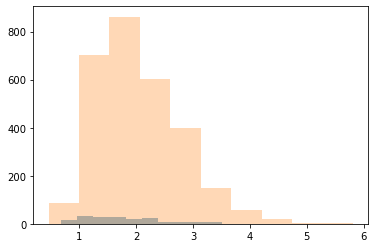

In [38]:
# test if pressure nulls are dont random in relation to the wind speed

x1 = df_copy2.loc[df_copy2['daily_average_atmospheric_pressure_aut_m_b_nulls']==1, 'wind_average_daily_speed_ms']
x0 =df_copy2.loc[df_copy2['daily_average_atmospheric_pressure_aut_m_b_nulls']==0, 'wind_average_daily_speed_ms']
plt.hist(x1,alpha=0.5)
plt.hist(x0,alpha=0.3)

Missing Mechanism appears to be MCAR, (probably due to equipment malfunction)

-----------------------------
### Missing values treatment:
1. Use 'ffill' and 'bfill' in for when 1-2 rows missing
2. Drop rows where all climate data is missing
3. Use KNN to fill the remaining nulls

In [39]:
col_list = ['total_daily_rainfall_aut_mm',
       'daily_average_atmospheric_pressure_aut_m_b',
       'average_daily_dew_point_temp_c', 'max_daily_temp_c',
       'average_daily_temp_c', 'min_daily_temp_c',
       'average_daily_air_relative_humidity_aut',
       'minimum_daily_air_humidity_aut', 'wind_max_daily_gust_ms',
       'wind_average_daily_speed_ms']

In [40]:
df_clean = df.copy()

# fillna for single rows
df_clean.fillna(method = 'ffill', limit = 1, inplace = True)
df_clean.fillna(method = 'bfill', limit = 1, inplace = True)
df_clean.isnull().sum()

city                                            0
medication_date                                 0
total_daily_rainfall_aut_mm                   617
daily_average_atmospheric_pressure_aut_m_b    457
average_daily_dew_point_temp_c                309
max_daily_temp_c                              219
average_daily_temp_c                          355
min_daily_temp_c                              220
average_daily_air_relative_humidity_aut       263
minimum_daily_air_humidity_aut                219
wind_max_daily_gust_ms                        220
wind_average_daily_speed_ms                   284
Date                                            0
year                                            0
month                                           0
week                                            0
dtype: int64

In [41]:
#drop rows

df_clean.dropna(how= 'all', subset = col_list, inplace = True)
df_clean.isnull().sum()

city                                            0
medication_date                                 0
total_daily_rainfall_aut_mm                   401
daily_average_atmospheric_pressure_aut_m_b    241
average_daily_dew_point_temp_c                 93
max_daily_temp_c                                3
average_daily_temp_c                          139
min_daily_temp_c                                4
average_daily_air_relative_humidity_aut        47
minimum_daily_air_humidity_aut                  3
wind_max_daily_gust_ms                          4
wind_average_daily_speed_ms                    68
Date                                            0
year                                            0
month                                           0
week                                            0
dtype: int64

<AxesSubplot:>

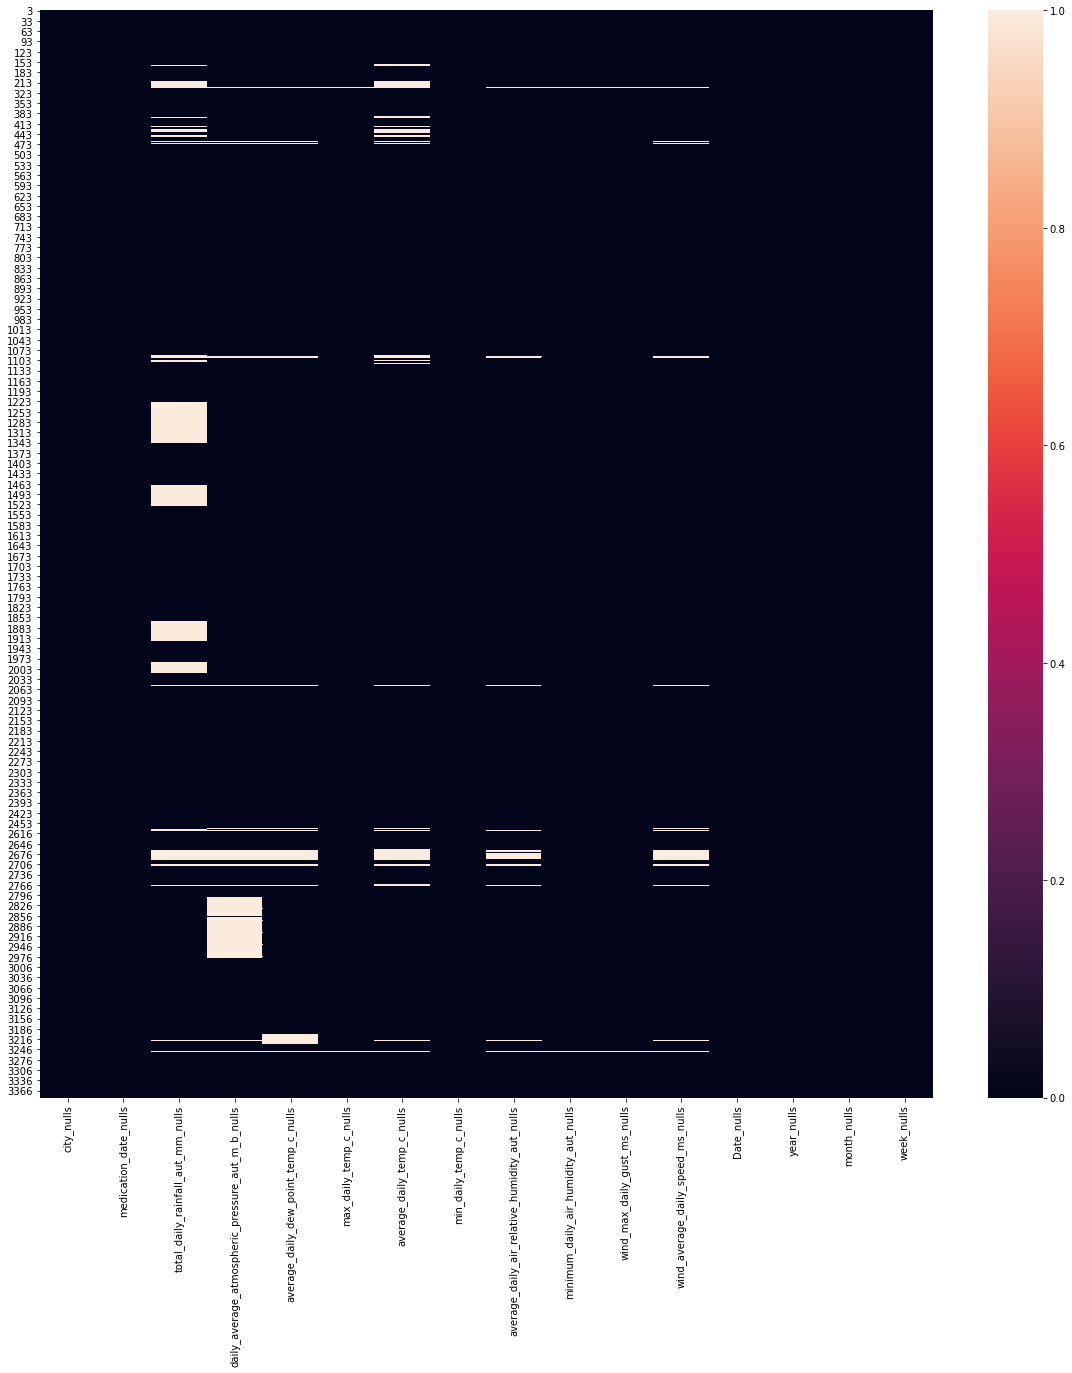

In [42]:
columns = list(df_clean.columns)
df_copy2 = df_clean.copy()

for col in df.columns:
    new_col_name = col+"_nulls"
    df_copy2[new_col_name] = 0
    df_copy2.loc[(df_copy2[col].isnull()),[new_col_name]] = 1
    
df_copy2.drop(columns=columns, inplace=True)
    
plt.figure(figsize=(20,20))
sns.heatmap(df_copy2)

<AxesSubplot:>

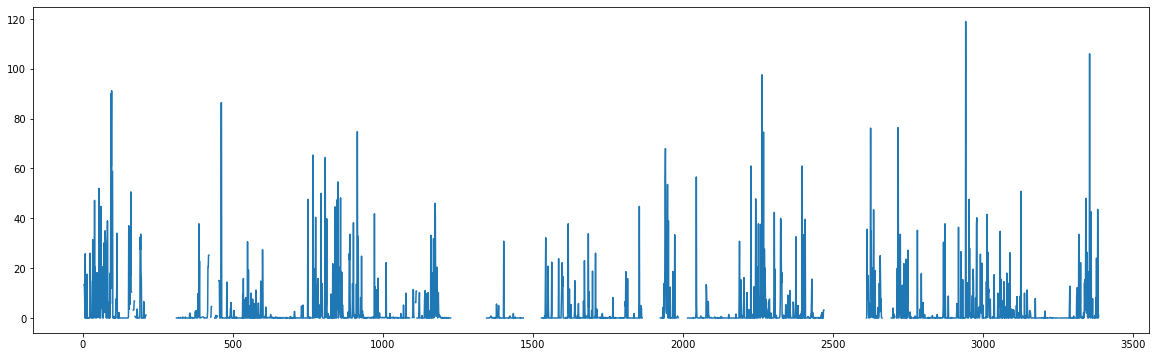

In [43]:
df_clean['total_daily_rainfall_aut_mm'].plot(figsize=(20,6))

<AxesSubplot:>

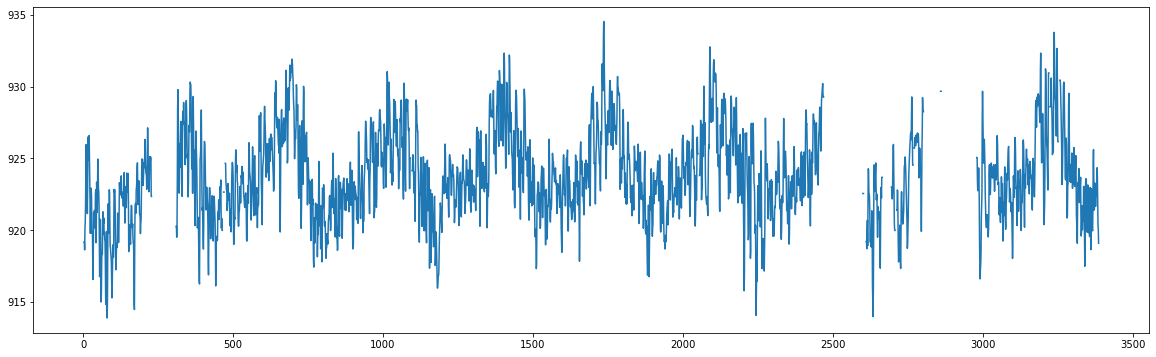

In [44]:
df_clean['daily_average_atmospheric_pressure_aut_m_b'].plot(figsize=(20,6))

In [45]:
imputer = KNNImputer(copy = False)
df_clean[col_list] = imputer.fit_transform(df_clean[col_list])


df_clean.isnull().sum()

city                                          0
medication_date                               0
total_daily_rainfall_aut_mm                   0
daily_average_atmospheric_pressure_aut_m_b    0
average_daily_dew_point_temp_c                0
max_daily_temp_c                              0
average_daily_temp_c                          0
min_daily_temp_c                              0
average_daily_air_relative_humidity_aut       0
minimum_daily_air_humidity_aut                0
wind_max_daily_gust_ms                        0
wind_average_daily_speed_ms                   0
Date                                          0
year                                          0
month                                         0
week                                          0
dtype: int64

<AxesSubplot:>

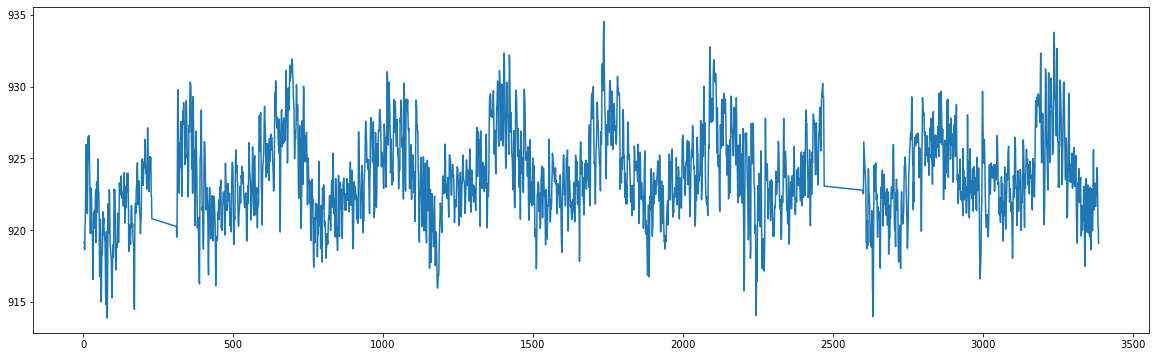

In [46]:
df_clean['daily_average_atmospheric_pressure_aut_m_b'].plot(figsize=(20,6))

<AxesSubplot:>

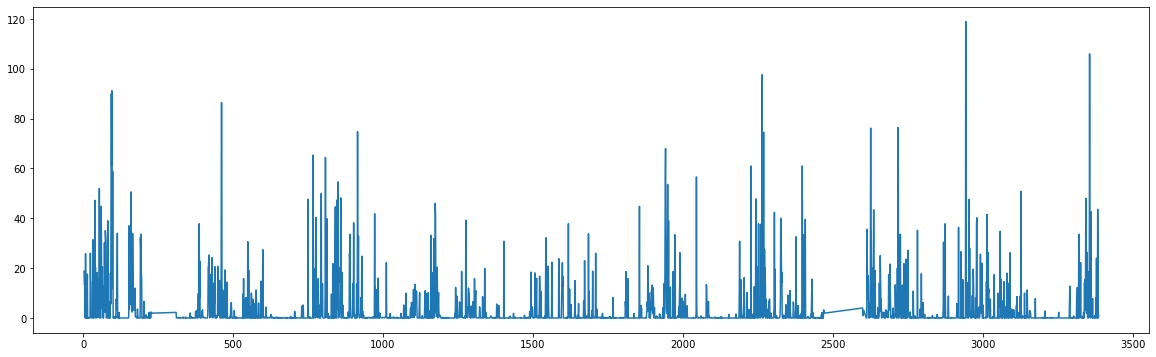

In [47]:
df_clean['total_daily_rainfall_aut_mm'].plot(figsize=(20,6))

Keep only rows with relevent dates. i.e. drop all rows with year < 2012

In [48]:
df_clean.drop(df_clean[df_clean['year'] < 2012].index, inplace = True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2790 entries, 464 to 3386
Data columns (total 16 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   city                                        2790 non-null   object        
 1   medication_date                             2790 non-null   object        
 2   total_daily_rainfall_aut_mm                 2790 non-null   float64       
 3   daily_average_atmospheric_pressure_aut_m_b  2790 non-null   float64       
 4   average_daily_dew_point_temp_c              2790 non-null   float64       
 5   max_daily_temp_c                            2790 non-null   float64       
 6   average_daily_temp_c                        2790 non-null   float64       
 7   min_daily_temp_c                            2790 non-null   float64       
 8   average_daily_air_relative_humidity_aut     2790 non-null   float64       
 9   minimu

In [49]:
#fix problem of the number of last week of the year 

df_clean.loc[(df_clean['week'] == 1) & (df_clean['month'] == 12), 'year'] = df_clean['year'] +1
df_clean.loc[(df_clean['week'] >= 52) & (df_clean['month'] == 1), 'year'] = df_clean['year'] -1
df_clean.tail(10)

,city,medication_date,total_daily_rainfall_aut_mm,daily_average_atmospheric_pressure_aut_m_b,average_daily_dew_point_temp_c,max_daily_temp_c,average_daily_temp_c,min_daily_temp_c,average_daily_air_relative_humidity_aut,minimum_daily_air_humidity_aut,wind_max_daily_gust_ms,wind_average_daily_speed_ms,Date,year,month,week
3377,Manhuacu,23/12/2019,8.2,922.329167,18.541667,25.0,20.804167,18.9,87.291667,69.0,8.5,1.904167,2019-12-23,2019,12,52
3378,Manhuacu,24/12/2019,5.4,922.358333,18.375000,22.7,19.891667,19.4,91.125000,78.0,7.5,1.520833,2019-12-24,2019,12,52
3379,Manhuacu,25/12/2019,24.0,922.445833,17.483333,28.8,21.566667,16.6,79.583333,51.0,6.8,1.483333,2019-12-25,2019,12,52
3380,Manhuacu,26/12/2019,0.0,923.520833,17.391667,29.7,23.087500,18.7,72.458333,43.0,7.9,2.425000,2019-12-26,2019,12,52
3381,Manhuacu,27/12/2019,0.0,924.341667,16.512500,28.7,22.408333,18.4,71.250000,41.0,8.7,2.775000,2019-12-27,2019,12,52
3382,Manhuacu,28/12/2019,0.0,923.641667,17.200000,29.7,22.029167,18.2,76.208333,42.0,10.9,2.691667,2019-12-28,2019,12,52
3383,Manhuacu,29/12/2019,43.6,922.150000,16.912500,28.2,21.162500,18.3,78.625000,47.0,21.0,1.700000,2019-12-29,2019,12,52
3384,Manhuacu,30/12/2019,17.0,920.366667,16.233333,28.3,21.416667,16.1,74.458333,41.0,8.3,1.720833,2019-12-30,2020,12,1
3385,Manhuacu,31/12/2019,0.0,920.033333,16.829167,28.6,22.291667,17.7,73.125000,42.0,9.2,1.645833,2019-12-31,2020,12,1
3386,Manhuacu,01/01/2020,1.0,919.075000,17.191667,29.7,23.416667,18.4,70.291667,44.0,8.8,1.979167,2020-01-01,2020,1,1


In [50]:
df_clean.head()

,city,medication_date,total_daily_rainfall_aut_mm,daily_average_atmospheric_pressure_aut_m_b,average_daily_dew_point_temp_c,max_daily_temp_c,average_daily_temp_c,min_daily_temp_c,average_daily_air_relative_humidity_aut,minimum_daily_air_humidity_aut,wind_max_daily_gust_ms,wind_average_daily_speed_ms,Date,year,month,week
464,Manhuacu,01/01/2012,0.00,919.970833,18.491667,24.1,21.100000,20.0,86.066667,74.0,11.5,2.620833,2012-01-01,2011,1,52
465,Manhuacu,02/01/2012,9.32,921.128611,17.953889,23.0,19.947500,19.8,86.066667,79.0,9.6,2.781389,2012-01-02,2012,1,1
466,Manhuacu,03/01/2012,11.12,922.021667,18.785000,24.7,20.922500,19.8,87.416667,72.0,7.5,1.987500,2012-01-03,2012,1,1
467,Manhuacu,04/01/2012,2.92,922.644529,17.619022,24.7,20.780942,18.0,82.000000,68.0,7.3,2.557029,2012-01-04,2012,1,1
468,Manhuacu,05/01/2012,0.00,922.643478,17.482609,26.0,20.613043,17.4,80.600000,61.0,10.8,3.043478,2012-01-05,2012,1,1


In [51]:
# make column of 'week of the year' in format yyyyww

df_clean['week'] = df_clean['week'].astype('str').str.pad(width=2, side='left', fillchar='0')
df_clean["weekofyear"] = df_clean['year'].astype('str') + df_clean['week'].astype('str')
df_clean.tail(10)

,city,medication_date,total_daily_rainfall_aut_mm,daily_average_atmospheric_pressure_aut_m_b,average_daily_dew_point_temp_c,max_daily_temp_c,average_daily_temp_c,min_daily_temp_c,average_daily_air_relative_humidity_aut,minimum_daily_air_humidity_aut,wind_max_daily_gust_ms,wind_average_daily_speed_ms,Date,year,month,week,weekofyear
3377,Manhuacu,23/12/2019,8.2,922.329167,18.541667,25.0,20.804167,18.9,87.291667,69.0,8.5,1.904167,2019-12-23,2019,12,52,201952
3378,Manhuacu,24/12/2019,5.4,922.358333,18.375000,22.7,19.891667,19.4,91.125000,78.0,7.5,1.520833,2019-12-24,2019,12,52,201952
3379,Manhuacu,25/12/2019,24.0,922.445833,17.483333,28.8,21.566667,16.6,79.583333,51.0,6.8,1.483333,2019-12-25,2019,12,52,201952
3380,Manhuacu,26/12/2019,0.0,923.520833,17.391667,29.7,23.087500,18.7,72.458333,43.0,7.9,2.425000,2019-12-26,2019,12,52,201952
3381,Manhuacu,27/12/2019,0.0,924.341667,16.512500,28.7,22.408333,18.4,71.250000,41.0,8.7,2.775000,2019-12-27,2019,12,52,201952
3382,Manhuacu,28/12/2019,0.0,923.641667,17.200000,29.7,22.029167,18.2,76.208333,42.0,10.9,2.691667,2019-12-28,2019,12,52,201952
3383,Manhuacu,29/12/2019,43.6,922.150000,16.912500,28.2,21.162500,18.3,78.625000,47.0,21.0,1.700000,2019-12-29,2019,12,52,201952
3384,Manhuacu,30/12/2019,17.0,920.366667,16.233333,28.3,21.416667,16.1,74.458333,41.0,8.3,1.720833,2019-12-30,2020,12,01,202001
3385,Manhuacu,31/12/2019,0.0,920.033333,16.829167,28.6,22.291667,17.7,73.125000,42.0,9.2,1.645833,2019-12-31,2020,12,01,202001
3386,Manhuacu,01/01/2020,1.0,919.075000,17.191667,29.7,23.416667,18.4,70.291667,44.0,8.8,1.979167,2020-01-01,2020,1,01,202001


In [52]:
df_clean.head()

,city,medication_date,total_daily_rainfall_aut_mm,daily_average_atmospheric_pressure_aut_m_b,average_daily_dew_point_temp_c,max_daily_temp_c,average_daily_temp_c,min_daily_temp_c,average_daily_air_relative_humidity_aut,minimum_daily_air_humidity_aut,wind_max_daily_gust_ms,wind_average_daily_speed_ms,Date,year,month,week,weekofyear
464,Manhuacu,01/01/2012,0.00,919.970833,18.491667,24.1,21.100000,20.0,86.066667,74.0,11.5,2.620833,2012-01-01,2011,1,52,201152
465,Manhuacu,02/01/2012,9.32,921.128611,17.953889,23.0,19.947500,19.8,86.066667,79.0,9.6,2.781389,2012-01-02,2012,1,01,201201
466,Manhuacu,03/01/2012,11.12,922.021667,18.785000,24.7,20.922500,19.8,87.416667,72.0,7.5,1.987500,2012-01-03,2012,1,01,201201
467,Manhuacu,04/01/2012,2.92,922.644529,17.619022,24.7,20.780942,18.0,82.000000,68.0,7.3,2.557029,2012-01-04,2012,1,01,201201
468,Manhuacu,05/01/2012,0.00,922.643478,17.482609,26.0,20.613043,17.4,80.600000,61.0,10.8,3.043478,2012-01-05,2012,1,01,201201


In [40]:
df_clean.to_csv('Manhuacu_climate_KNN.csv', index=False)